# **Perceptron de Rosenblatt**

A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma rede Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador.

**Importando as bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random, math

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
TEMPLATE = 'plotly_dark'
size = 800

# **Parte 1 - Processamento dos Dados**

**Criando o dataset**

In [ ]:
padroes = [([0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]),
           ([0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0]),
           ([0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0]),
           ([0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0]),
           ([1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0]),
           ([1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0]),
           ([1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0]),
           ([1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1]),
           ]

dados = [([x[0]+random.uniform(-1,1)/10, x[1]+random.uniform(-1,1)/10, x[2]+random.uniform(-1,1)/10], y)
                for x, y in padroes
                for __ in range(50)]
       
X = []
Y = []
X_y_plot = []
for x, y in dados:
  X.append(x)
  Y.append(y)
  X_y_plot.append([*x, y.index(1)])

X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X)

[[-0.05417366 -0.050502   -0.04079164]
 [-0.01912065 -0.08790803  0.07865077]
 [-0.04162816  0.07072528  0.06760775]
 ...
 [ 0.9109752   0.92519202  0.96445952]
 [ 1.01108989  0.99402564  1.04945471]
 [ 1.08147825  1.04751898  1.00638201]]


In [ ]:
print(Y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
df_to_plot = pd.DataFrame(X_y_plot, columns=["x", "y", "z", "c"])

In [ ]:
fig = px.scatter_3d(df_to_plot,x="x",y='y',z='z', color='c')
fig.update_layout(width=600, height=400)

**Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
print('Tamanho do conjunto de treinamento:', len(X_train))
print('Tamanho do conjunto de teste:', len(X_test))

Tamanho do conjunto de treinamento: 320
Tamanho do conjunto de teste: 80


**Padronização dos dados**



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Parte 2 - Construção da Rede**

In [ ]:
model = tf.keras.models.Sequential([ 
               tf.keras.layers.Dense(units=8, activation = 'sigmoid', input_dim=3)])

# **Parte 3 - Treinando a Rede**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=300, batch_size=10, verbose=0)

# **Parte 4 - Avaliando o Modelo**

**Verificando o conjunto de testes**

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

**Matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(
    Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[13  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  6]]


In [ ]:
accuracy_score(Y_test, y_pred)

1.0

**Gráfico da acurácia**

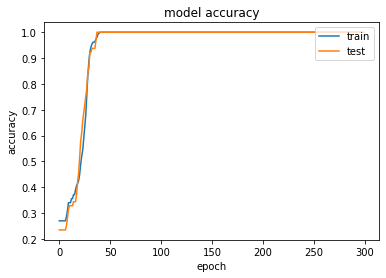

In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right') 

**Gráfico da perda**

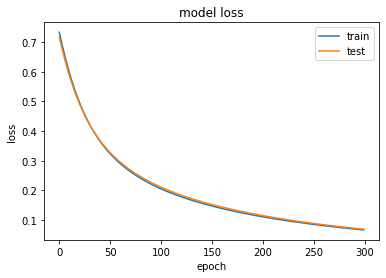

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()